<a href="https://colab.research.google.com/github/upparasudharani/Diabetes-prediction/blob/main/multiclass_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore")
df = pd.read_excel("/content/drive/MyDrive/Patient Data/dataset_DN.xlsx")
df
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      519 non-null    int64  
 1   Age     519 non-null    int64  
 2   Gender  519 non-null    object 
 3   BU      508 non-null    float64
 4   SCr     519 non-null    float64
 5   HbA1c   504 non-null    float64
 6   Class   519 non-null    object 
 7   eGFR    519 non-null    float64
 8   Stages  519 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 36.6+ KB


In [40]:
for i in range(len(df['Stages'])):
  if df.Stages[i]=='Stage I':
    df.Stages[i]=1
  elif df.Stages[i]=='Stage II':
    df.Stages[i]=2
  elif df.Stages[i]=='Stage III':
    df.Stages[i]=3
  elif df.Stages[i]=='Stage IV':
    df.Stages[i]=4
  else:
    df.Stages[i]=5
df['Stages']=df['Stages'].factorize()[0].astype(float)


In [41]:
#Replace categorical values with numbers
df['Gender'].value_counts()
categories = {"male":0, "female":1}
df['Gender']=df['Gender'].factorize()[0].astype('float')
df['Gender'] = df['Gender'].replace(categories)
df['Class'].value_counts()

categories = {"DN":0, "non-DN":1}
df['Class']=df['Class'].factorize()[0].astype(float)
df['Class'] = df['Class'].replace(categories)

In [42]:
df.head()

,ID,Age,Gender,BU,SCr,HbA1c,Class,eGFR,Stages
0,1,50,0.0,30.71,1.02,6.90,0.0,99.586405,0.0
1,2,62,0.0,31.01,1.26,6.60,1.0,74.702037,1.0
2,3,65,1.0,27.11,0.81,7.50,0.0,75.422987,1.0
3,4,74,0.0,26.51,6.98,8.50,1.0,9.994300,2.0
4,5,40,0.0,39.88,1.16,10.56,0.0,89.828235,1.0


ID         0
Age        0
Gender     0
BU        11
SCr        0
HbA1c     15
Class      0
eGFR       0
Stages     0
dtype: int64
53.68147637795276
6.87468253968254
69.50957661402123
ID        0
Age       0
Gender    0
BU        0
SCr       0
HbA1c     0
Class     0
eGFR      0
Stages    0
dtype: int64
ID          int64
Age         int64
Gender    float64
BU        float64
SCr       float64
HbA1c     float64
Class     float64
eGFR      float64
Stages    float64
dtype: object


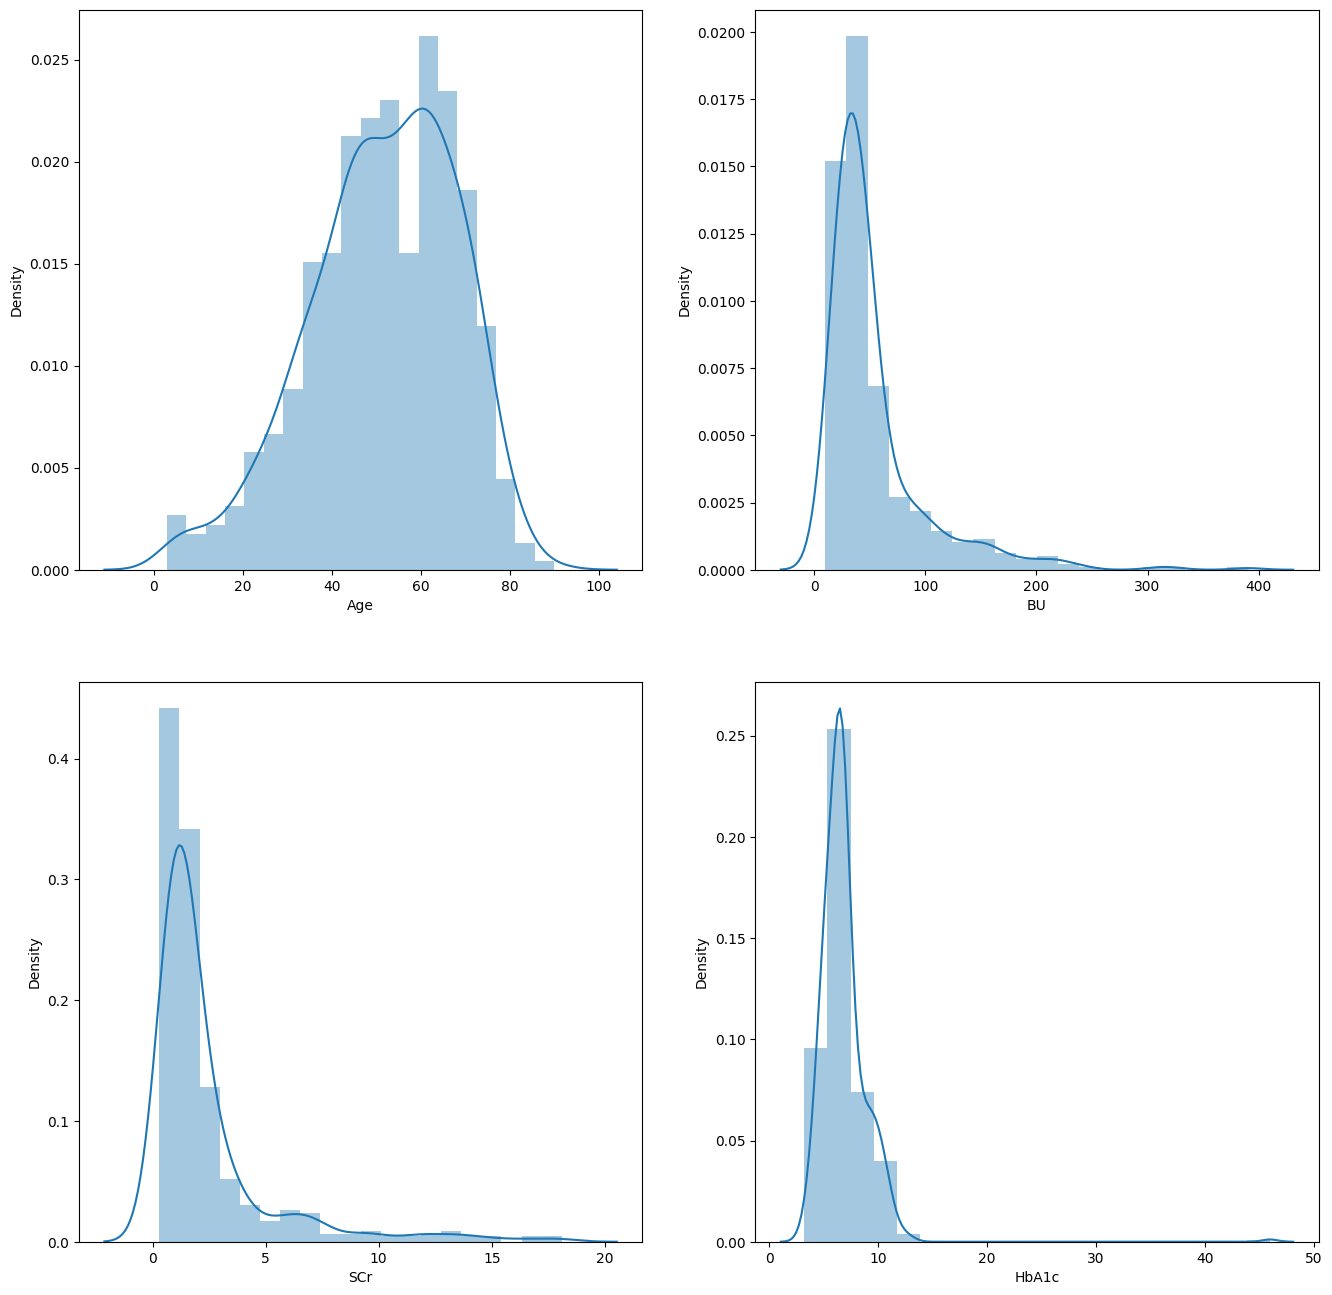

In [43]:
fig, ax = plt.subplots(2,2, figsize=(16,16))

sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.BU, bins = 20, ax=ax[0,1]) 
sns.distplot(df.SCr, bins = 20, ax=ax[1,0]) 
sns.distplot(df.HbA1c, bins = 20, ax=ax[1,1]) 


df.describe()
df_copy = df.copy(deep=True)
df_copy[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR', 'Stages']] = df_copy[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR', 'Stages']].replace(0,np.NaN)

print(df.isnull().sum())
#df = df.dropna()

print(df['BU'].mean())
df['BU'] = df['BU'].fillna(53.68)
print(df['HbA1c'].mean())
df['HbA1c'] = df['HbA1c'].fillna(6.87)
print(df['eGFR'].mean())
df['eGFR'] = df['eGFR'].fillna(69.50)
print(df.isnull().sum())

#Rename Dataset to Label to make it easy to understand

print(df.dtypes)

In [44]:

#Replace categorical values with numbers

df.describe()
df.info() 
df_copy['ID'].fillna(df_copy['ID'].mean(), inplace=True)
df_copy['Gender'].fillna(df_copy['Gender'].median(), inplace=True)
df_copy['Age'].fillna(df_copy['Age'].mean(), inplace=True)
df_copy['BU'].fillna(df_copy['BU'].median(), inplace=True)
df_copy['SCr'].fillna(df_copy['SCr'].median(), inplace=True)
df_copy['HbA1c'].fillna(df_copy['HbA1c'].median(), inplace=True)
df_copy['Class'].fillna(df_copy['Class'].median(), inplace=True)
df_copy['eGFR'].fillna(df_copy['eGFR'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      519 non-null    int64  
 1   Age     519 non-null    int64  
 2   Gender  519 non-null    float64
 3   BU      519 non-null    float64
 4   SCr     519 non-null    float64
 5   HbA1c   519 non-null    float64
 6   Class   519 non-null    float64
 7   eGFR    519 non-null    float64
 8   Stages  519 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 36.6 KB


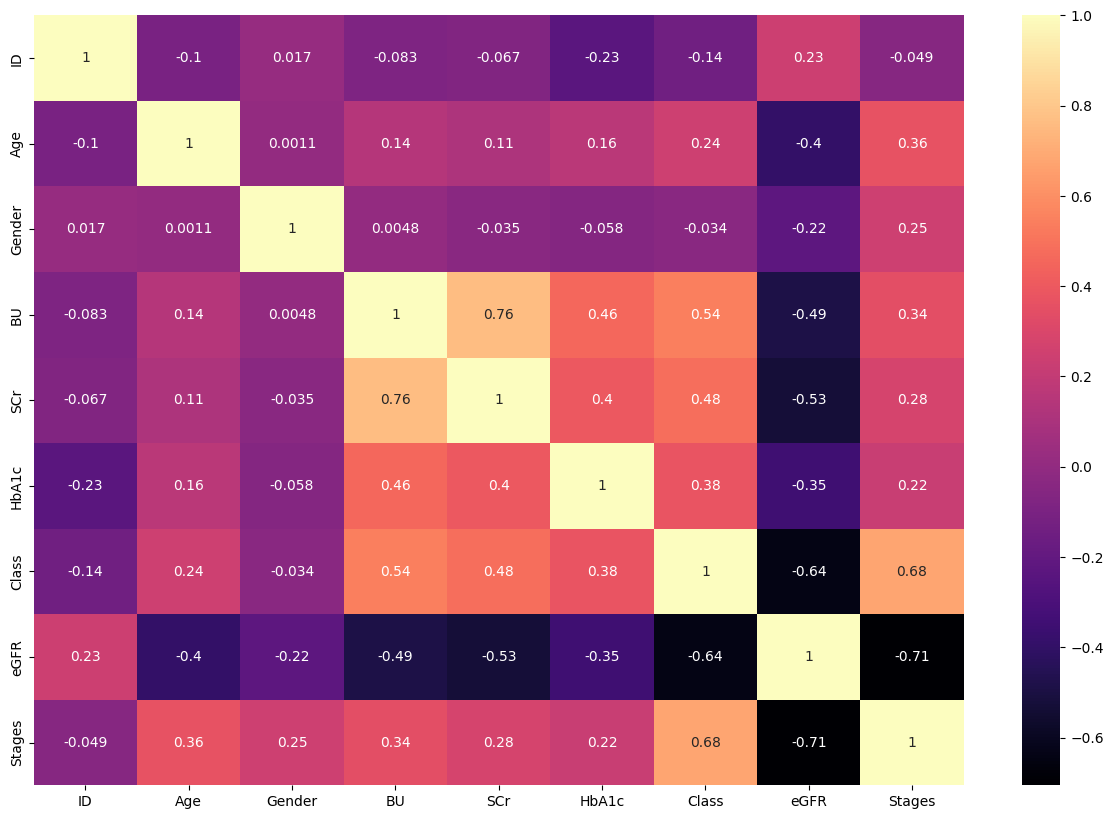

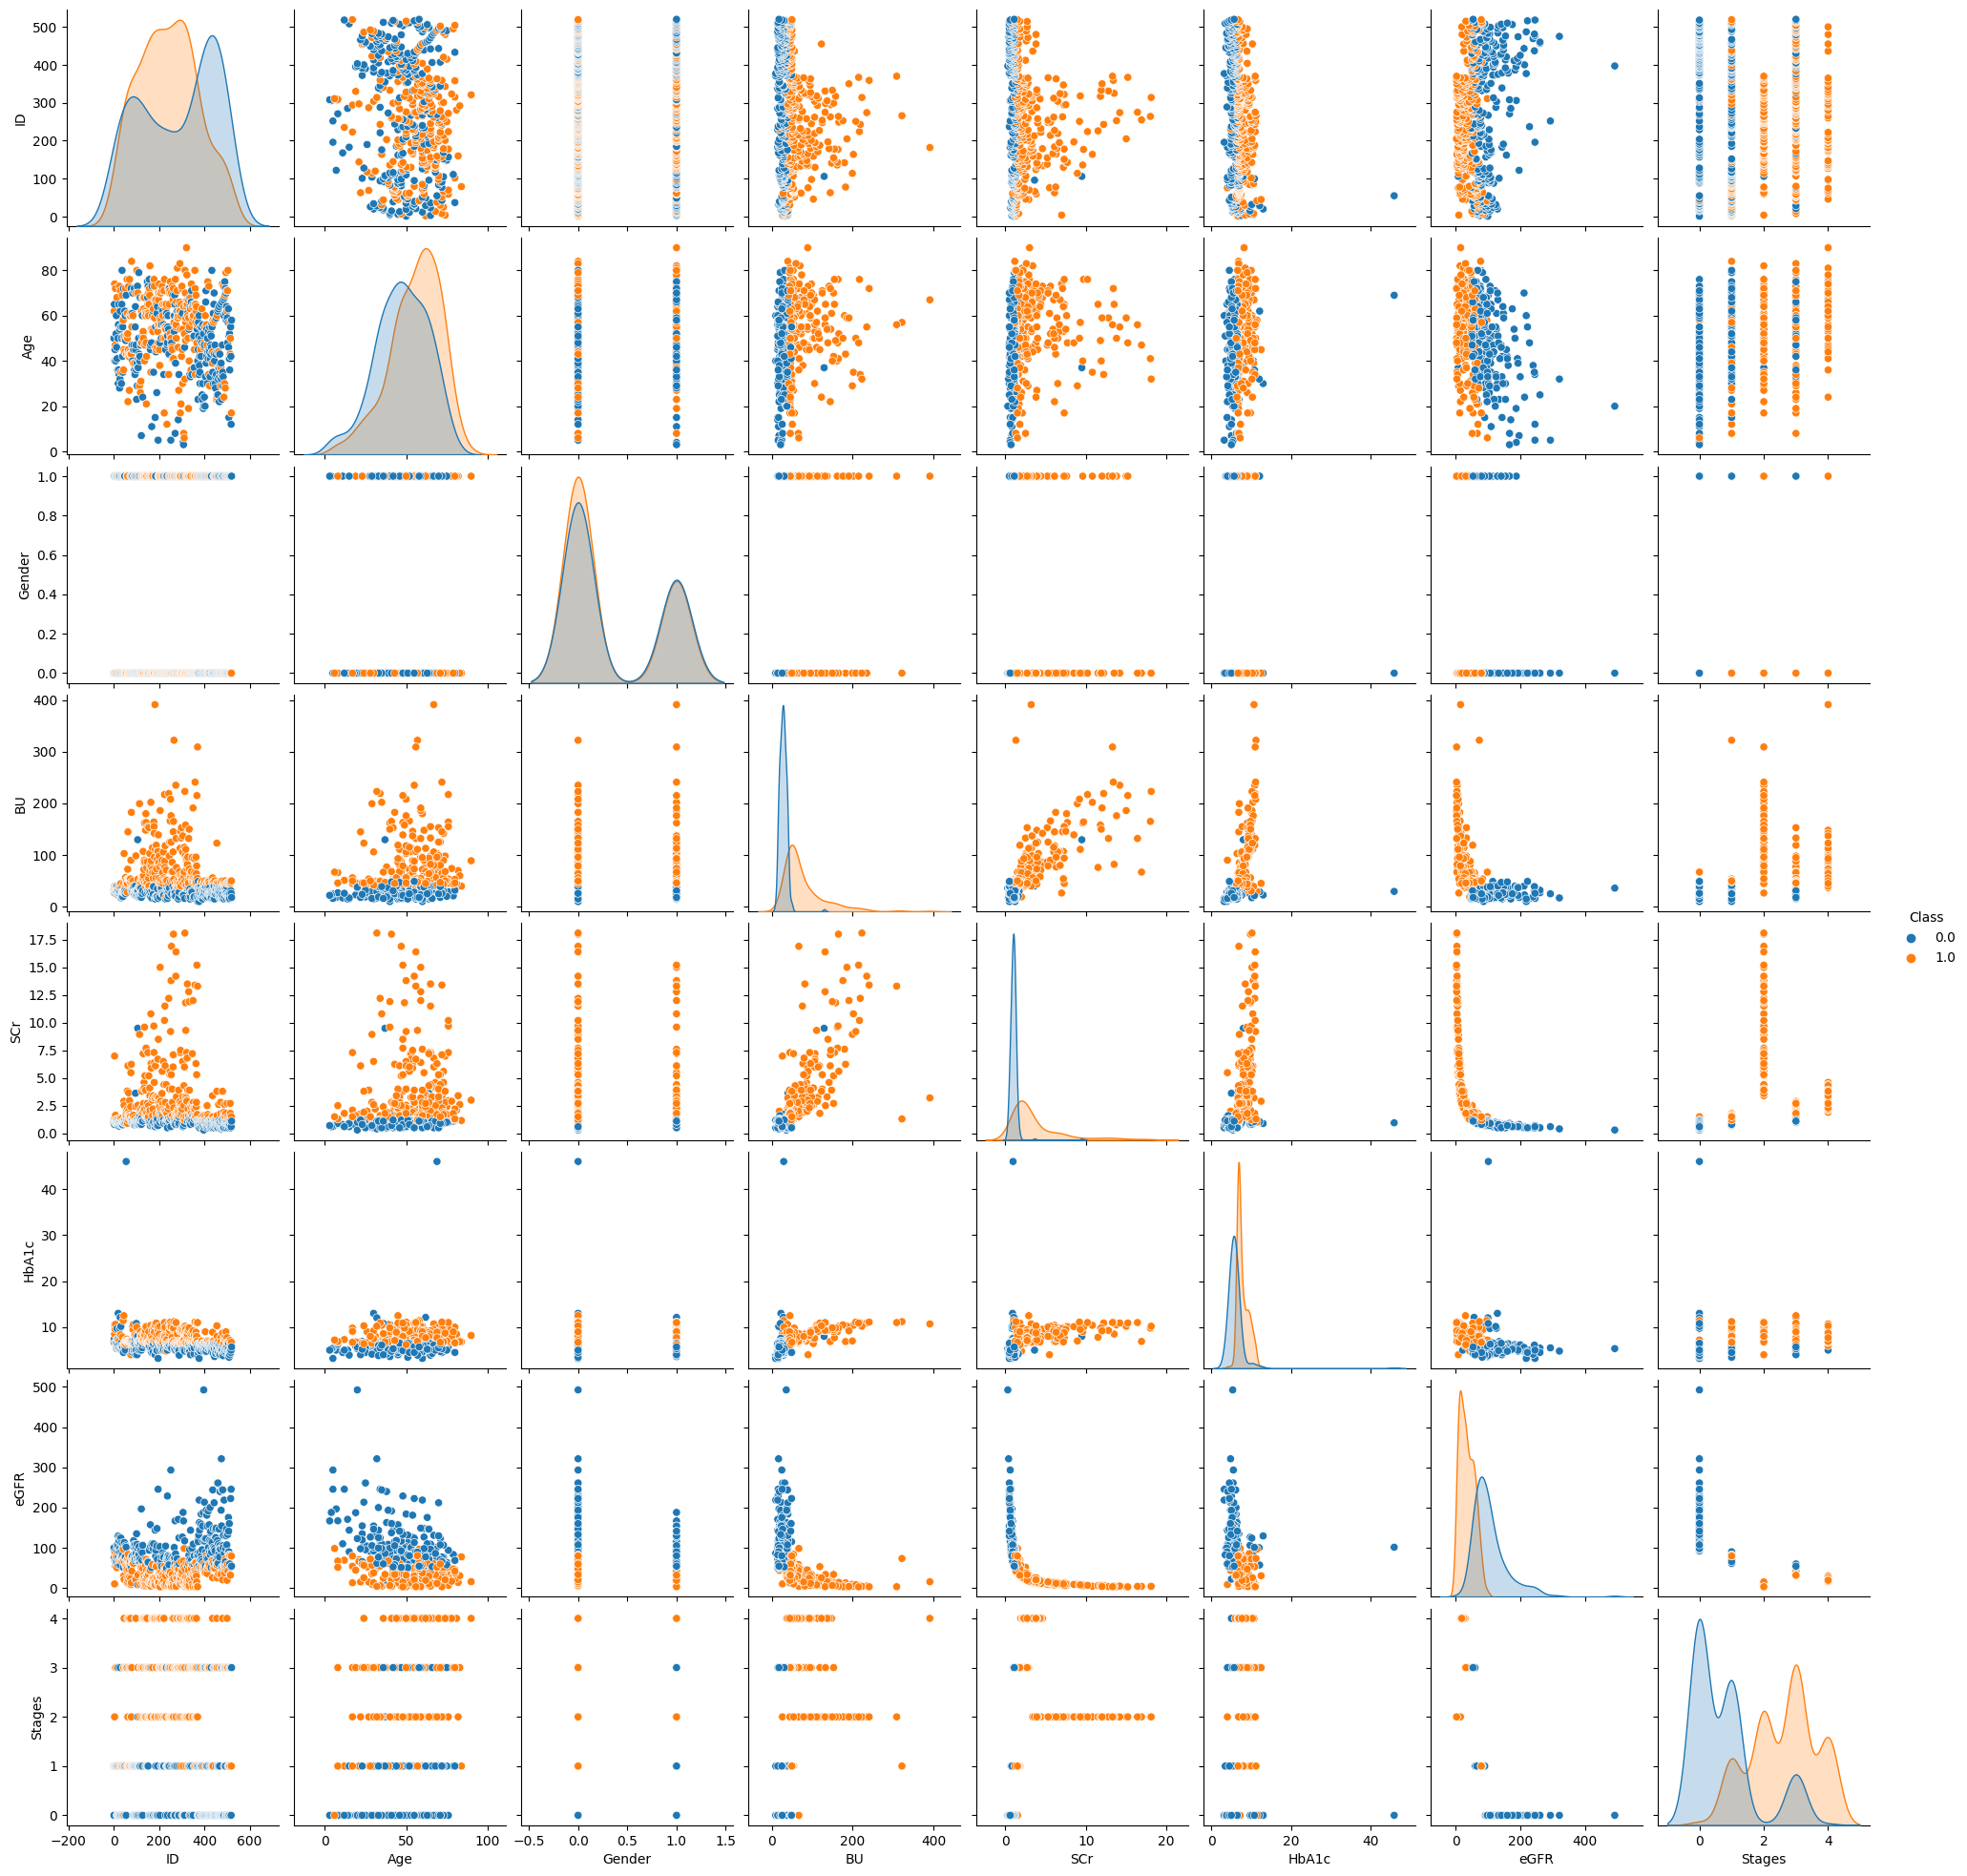

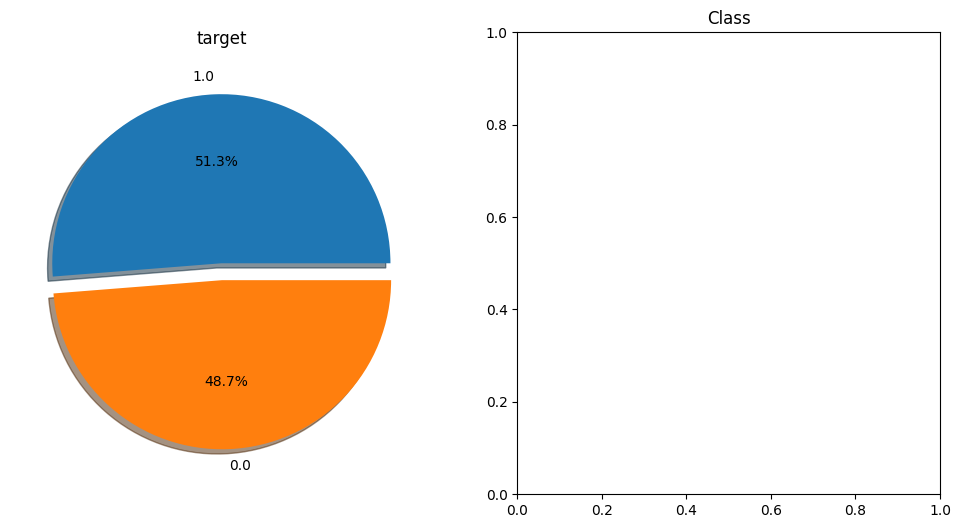

In [45]:
df.corr()

f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(df.corr(), annot=True, cmap = "magma" )

plt.show()

sns.pairplot(df,hue='Class')

df.isnull().sum()

f,ax=plt.subplots(1,2,figsize=(12,6))
df['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')

ax[1].set_title('Class')
plt.show()

In [46]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Stages"].values
df.info()
df["Stages"]
#Encode labels
#This is required by scikit learn when dealing with categorical data.

#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(Y)
y=label_encoder.transform(Y)
classes=label_encoder.classes_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      519 non-null    int64  
 1   Age     519 non-null    int64  
 2   Gender  519 non-null    float64
 3   BU      519 non-null    float64
 4   SCr     519 non-null    float64
 5   HbA1c   519 non-null    float64
 6   Class   519 non-null    float64
 7   eGFR    519 non-null    float64
 8   Stages  519 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 36.6 KB


In [47]:

X = df[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR']]
y = df['Stages']
cols = X.columns
index = X.index
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df[['ID', 'Age', 'Gender', 'BU', 'SCr', 'HbA1c', 'Class', 'eGFR']], df['Stages'], test_size=0.20, random_state=0)
     
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X = transformer.fit_transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [48]:



#Classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
accuracy_score(y_pred,y_test)

confusion_matrix(y_pred,y_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        27
         2.0       1.00      1.00      1.00        14
         3.0       1.00      0.93      0.96        29
         4.0       0.87      1.00      0.93        13

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



In [51]:

ID =input("ID:")
Age = input("Age:")
Gender =input("Gender:")
BU =input("Blood Urea:")
SCr = input("Serum Creatin :")
HbA1c =input("Hemoglobin:")
Class =input("Class:")
eGFR=input("eGFR")
prediction = RF.predict([[ID, Age,Gender, BU, SCr,HbA1c,Class,eGFR]])
prediction

ID:1
Age:25
Gender:1
Blood Urea:25
Serum Creatin :1
Hemoglobin:4
Class:0
eGFR96


array([0.])

In [52]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()



In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
  

In [56]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
df_model['Accuracy'] = accuracy.values()



df_model

,Accuracy
Logistic Regression,0.836538
Support Vector Machines,0.326923
Decision Trees,0.990385
Random Forest,0.980769
Naive Bayes,0.951923
K-Nearest Neighbor,0.769231


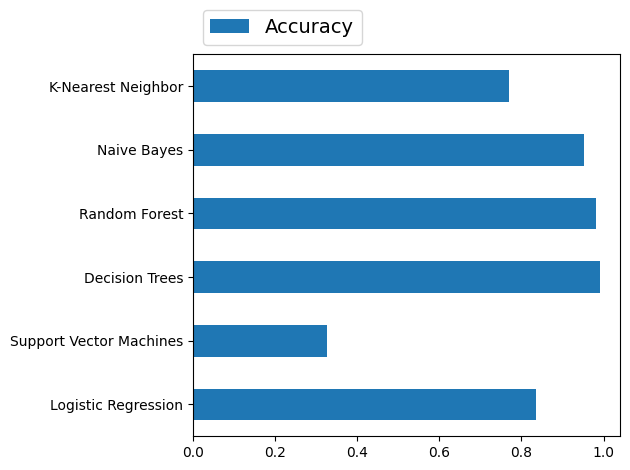

In [57]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

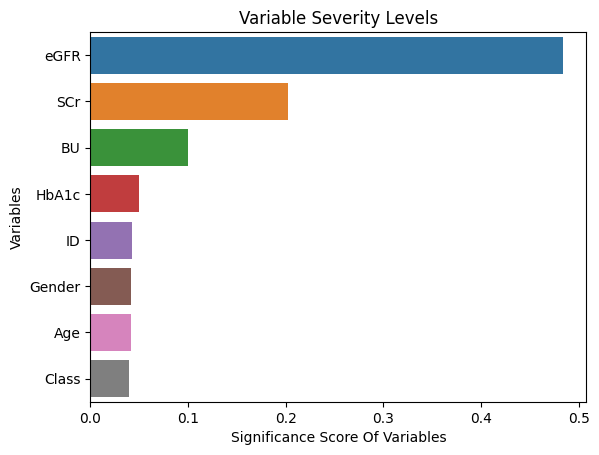

In [58]:
from sklearn.ensemble import RandomForestClassifier
     

model = RandomForestClassifier()
model.fit(X_train,y_train)

cross_val_score(model, X, y, cv = 10).mean()

feature_imp = pd.Series(model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


In [59]:
y_pred = model.predict(X_test)
y_pred


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
accuracy_score(y_pred,y_test)

confusion_matrix(y_pred,y_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        27
         2.0       1.00      1.00      1.00        14
         3.0       1.00      0.93      0.96        29
         4.0       0.87      1.00      0.93        13

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104

